## Assignment - Recommendation System

### Objective
The objective of this project is to build  a recommendation system to suggest customers with the beer they are most likely to buy.

### Problem Introduction
Each record includes a beer's name and the user's name, along with the ratings he/she has given to the beer. All ratings are on a scale from 1 to 5, with 5 being the best rating.

The different steps of this project are as follows:
1. Data reading
2. Cleaning  the data
3. Data preparation
4. Data Exploration
5. Building user-based and item-based recommendation models.

In [1]:
###Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading the file
beer=pd.read_csv("beer_data.csv", encoding='latin-1')
beer.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [3]:
#reading the datashape
print("DF shape",beer.shape)

DF shape (475984, 3)


The dataframe is called as "beer" and there are 475984 values in the original dataset alongwith three columns


In [4]:
#checking for nullvalues
beer.isnull().sum()* 100 / len(beer)

beer_beerid           0.000000
review_profilename    0.021009
review_overall        0.000000
dtype: float64

There are 0.021% of missing values in the  column review_profile name which are being removed below

In [5]:
#dropping null values
beer=beer.dropna(axis=0, how="any")
beer.isnull().sum()* 100 / len(beer)

beer_beerid           0.0
review_profilename    0.0
review_overall        0.0
dtype: float64

#### These indicate that the missing values have been removed

### Removing Duplicates

In [6]:
#Checking duplicates based on two cloumns
beer.duplicated(['beer_beerid','review_profilename']).sum()

1422

This indicates that there are nearly 1422 duplicate rows.The duplicate rows have been checked for only two columns because having two duplicates for reviews column is fine but haveing two entries for the same beer id and username will have an impact on the data.Therefore, the duplicates based on two different columns have been identified and are removed below

In [7]:
# dropping duplicate columns
beer = beer.drop_duplicates(['beer_beerid','review_profilename'],keep='first')

In [8]:
#checking the shape of the dataframe to check if duplicates are deleted
beer.shape

(474462, 3)

The original shape of the dataframe had 475984 and the number of duplicate rows were 1422, so the remaining rows after removing suplicate rows must be 474562 rows

In [9]:
#checking the type and nature of dataframe to check datashapes and the final shape
print(beer.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474462 entries, 0 to 475983
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_beerid         474462 non-null  int64  
 1   review_profilename  474462 non-null  object 
 2   review_overall      474462 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.5+ MB
None


In [10]:
# reading the  distribution of the data over the dataframe using describe
beer.describe()

,beer_beerid,review_overall
count,474462.000000,474462.000000
mean,21674.478038,3.814274
std,21798.233764,0.720484
min,3.000000,0.000000
25%,1717.000000,3.500000
50%,13896.000000,4.000000
75%,39417.000000,4.500000
max,77317.000000,5.000000


## Data preparation

The objective of this step is to choose only those beers that have at least N number of reviews and those beers should not have extremely low number of ratings.This is being achieved by plotting a histogram to identify the lowest number of ratings  and have a number of reviews and finally identify the optimum reviews

### Beer Reviews


In [11]:
average_reviews=pd.DataFrame(beer.beer_beerid.value_counts(sort=True))
average_reviews

,beer_beerid
2093,977
412,966
1904,902
1093,840
92,812
...,...
31461,1
53362,1
57460,1
42666,1


There are a varied number of ratings for each beer id the highest is for the id 2093 with 977 reviewws and the lowest number of reviews is 1 for few beer ids.The lowest number in the subsequent steps

Text(0.5, 0, 'number of reviews')

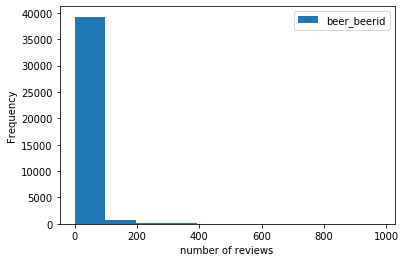

In [12]:
#plotting a graph
average_reviews.plot.hist(bins=10)
plt.xlabel('number of reviews')

A number of reviews are found to be between 0 to 200

In [13]:
#Checking Beerid which have recieved less than or equal 100 review
reviews = pd.DataFrame(average_reviews[average_reviews>=200])
reviews.dropna(axis=0,how='any')

,beer_beerid
2093,977.0
412,966.0
1904,902.0
1093,840.0
92,812.0
...,...
72138,201.0
47360,201.0
50697,201.0
1483,200.0


Text(0.5, 0, 'number of reviews')

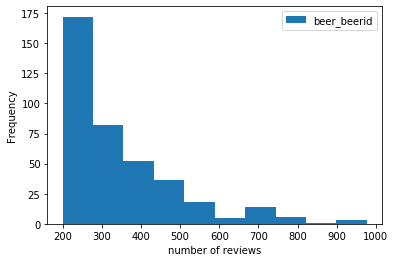

In [14]:
### plotting a histogram with the new filtered values
reviews.plot.hist(bins=10)
plt.xlabel('number of reviews')

The above graph indicates the frequency distribution of number of reviews

Text(0.5, 0, 'number of reviews')

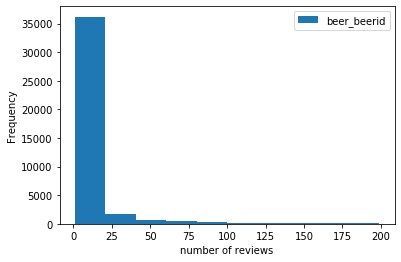

In [15]:
reviews_less=pd.DataFrame(average_reviews[average_reviews<200])
reviews_less.dropna(axis=0,how='any')
### plotting a histogram with the new filtered values
reviews_less.plot.hist(bins=10)
plt.xlabel('number of reviews')

The above histogram indicates that a number of reviews are greater than 75 hence fitlering the dataframe with reviews greater than 75 

In [16]:
## counting the number of beerids with only one review
average_reviews_one=average_reviews[average_reviews<=1]
average_reviews_one=average_reviews_one.dropna()
average_reviews_one.sum()

beer_beerid    18080.0
dtype: float64

There are nearly 18080 beerids with one review

In [17]:
#counting the number of values and filtering the fateatrame with more thant 40 reviews
beers_new = beer.groupby('beer_beerid')['review_overall'].count().reset_index()
print(beers_new.count())
beers_new = beers_new.sort_values('review_overall', ascending=False)
beers_new= beers_new[beers_new.review_overall >= 40]
beers_new.info()

beer_beerid       40304
review_overall    40304
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 1574 to 34210
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   beer_beerid     2499 non-null   int64
 1   review_overall  2499 non-null   int64
dtypes: int64(2)
memory usage: 58.6 KB


### Finding the optimal number based on the user reviews

Text(0.5, 0, 'number of reviews')

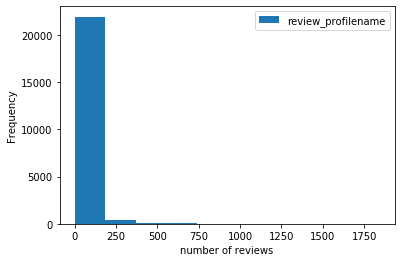

In [18]:
average_users = pd.DataFrame(beer.review_profilename.value_counts(sort=True))
#plotting a graph
average_users.plot.hist(bins=10)
plt.xlabel('number of reviews')

Text(0.5, 0, 'number of reviews')

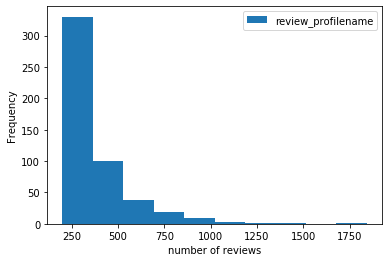

In [19]:
user_reviews = average_users[average_users>=200]
user_reviews=user_reviews.dropna(axis=0,how='any')
user_reviews.plot.hist(bins=10)
plt.xlabel('number of reviews')

Text(0.5, 0, 'number of reviews')

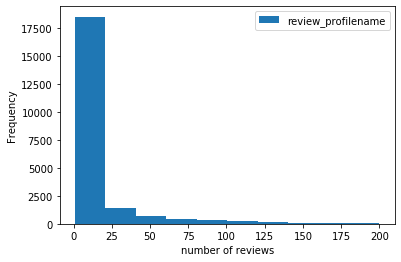

In [20]:
user_reviews_less = average_users[average_users<=200]
user_reviews=user_reviews_less.dropna(axis=0,how='any')
user_reviews_less.plot.hist(bins=10)
plt.xlabel('number of reviews')

In [21]:
average_users_one=average_users[average_users<=1]
average_users_one=average_users_one.dropna()
average_users_one.sum()

review_profilename    7977.0
dtype: float64

There are 7977 profiles with one review

In [22]:
users = beer.groupby('review_profilename')['review_overall'].count().reset_index()
users= users[users.review_overall >= 50]
users = users.sort_values('review_overall', ascending=False)
users.head(5)

,review_profilename,review_overall
18188,northyorksammy,1842
17373,mikesgroove,1373
1629,BuckeyeNation,1336
8470,Thorpe429,1072
1910,ChainGangGuy,1046


Filtering the reviews with values greater than fifty as a larger number of reviews are greater than fifty and merging these dataframes would provide us with the optimal values

In [23]:
#Creating new Data Frame after applying filter 
beer_final= beer.merge(beers_new,how='inner',on='beer_beerid')
beer_final = beer_final.merge(users,how='inner',on='review_profilename')
beer_final=beer_final.reset_index()
beer_final

,index,beer_beerid,review_profilename,review_overall_x,review_overall_y,review_overall
0,0,436,Brent,3.0,127,518
1,1,10784,Brent,4.0,119,518
2,2,16074,Brent,4.0,431,518
3,3,33644,Brent,4.0,261,518
4,4,1122,Brent,5.0,54,518
...,...,...,...,...,...,...
217552,217552,878,kmacphail,3.0,63,56
217553,217553,724,kmacphail,3.5,104,56
217554,217554,1826,kmacphail,5.0,113,56
217555,217555,401,kmacphail,4.5,63,56


In [24]:
# renaming the values in the dataframe for better readability
beer_final.rename(columns={'review_overall_x' : 'reviews','review_overall_y':'beers_reviews',
                           'review_overall' : 'users_reviews'},    inplace = True)
beer_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217557 entries, 0 to 217556
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               217557 non-null  int64  
 1   beer_beerid         217557 non-null  int64  
 2   review_profilename  217557 non-null  object 
 3   reviews             217557 non-null  float64
 4   beers_reviews       217557 non-null  int64  
 5   users_reviews       217557 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 10.0+ MB


The current dataframe has 21757 values and 6 columns.The beers with atleast  beer review >= 40 and user reviews >=50 bhas been chose for further data analysis.

## Data exploration

The objectives of the current dataframe are as follows:

1. To identify the unique values of ratings

2. Visualise the rating values and notice: 


   a. The average beer ratings
   b. The average user ratings
   c. The average number of ratings given to the beers
   d.The average number of ratings given by the users


### Unique Values of the Ratings



In [25]:
a= beer_final.reviews.value_counts(sort=True)
a

4.0    83321
4.5    47379
3.5    41332
3.0    20382
5.0    11782
2.5     6755
2.0     4291
1.5     1258
1.0     1057
Name: reviews, dtype: int64

Text(0, 0.5, 'Number of Ratings')

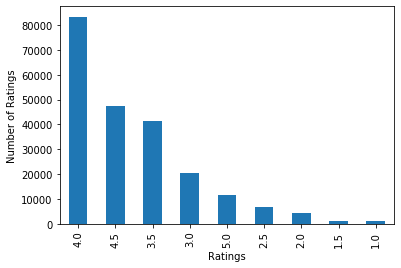

In [26]:
## visualing representing the number of ratings
a.plot(kind='bar')
plt.xlabel("Ratings")
plt.ylabel("Number of Ratings")

The above list indicates that there are a larger number of ratings with 4 followed by 4.5 and very few ratings with 1

### Visualise the Rating values

#### The average beer ratings 

In [27]:
avg_bybeer=beer_final.groupby('beer_beerid')['reviews'].agg(['mean']).reset_index()
avg_bybeer

,beer_beerid,mean
0,5,3.506173
1,6,3.700617
2,7,3.248000
3,10,3.855346
4,14,3.875000
...,...,...
2494,74530,4.000000
2495,74548,3.800000
2496,74579,3.697368
2497,74986,4.201299


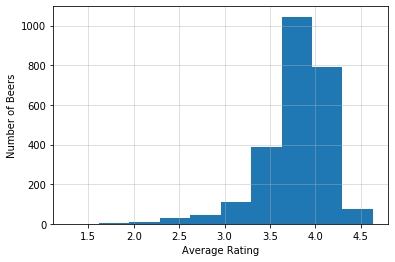

In [28]:
#plotting a graph
plt.hist(avg_bybeer['mean'], bins=10)
plt.grid(axis='x', alpha=0.50)
plt.grid(axis='y', alpha=0.50)
plt.xlabel('Average Rating')
plt.ylabel('Number of Beers')
plt.show()

### The average user ratings

In [29]:
#calcularing average user ratings
avg_byuser=beer_final.groupby('review_profilename')['reviews'].agg(['mean']).reset_index()
avg_byuser

,review_profilename,mean
0,1759Girl,3.682927
1,1fastz28,3.862745
2,3Vandoo,3.891304
3,4000qtrap,3.763158
4,4DAloveofSTOUT,4.000000
...,...,...
2181,zimm421,3.946429
2182,zoolzoo,3.666667
2183,zoso1967,3.969231
2184,zoso493,3.981132


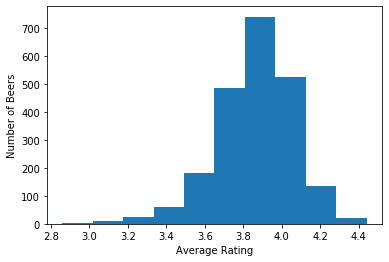

In [30]:
## plotting a graph to show the same
plt.hist(avg_byuser['mean'], bins=10)
plt.xlabel('Average Rating')
plt.ylabel('Number of Beers')
plt.show()

### The average number of ratings given to the beers

In [31]:
beer_reviews = beer_final.groupby('beer_beerid')['beers_reviews'].agg(['mean']).reset_index()
beer_reviews.head()

,beer_beerid,mean
0,5,113
1,6,253
2,7,205
3,10,218
4,14,59


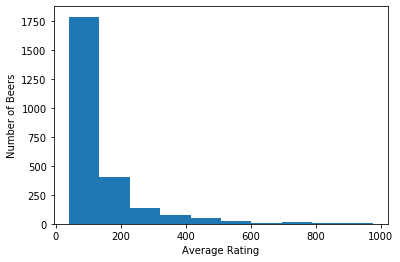

In [32]:
## plotting a graph to show the same
plt.hist(beer_reviews['mean'], bins=10)
plt.xlabel('Average Rating')
plt.ylabel('Number of Beers')
plt.show()

### The average number of ratings given by the users

In [33]:
user_reviews = beer_final.groupby('beer_beerid')['users_reviews'].agg(['mean']).reset_index()
user_reviews.head()

,beer_beerid,mean
0,5,277.234568
1,6,234.030864
2,7,240.408000
3,10,230.075472
4,14,340.583333


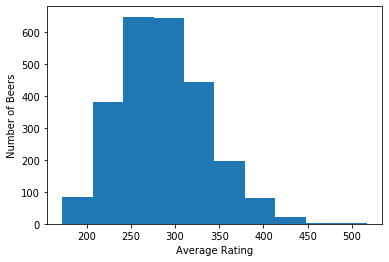

In [34]:
## plotting a graph to show the same
plt.hist(user_reviews['mean'], bins=10)
plt.xlabel('Average Rating')
plt.ylabel('Number of Beers')
plt.show()

## Recommnedation System

The different steps in the development of the recommendation system are as follows:
1. Splitting the data
2. Using similarity matrix/cosine simialrity
3. Normalisation of the data
4. Prediction
5. Evaluation of the test 
6. Calculation of RMSE to identify the better fit

### Splitting the Data

In [35]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(beer_final, test_size=0.30, random_state=31)
print(train.shape)
print(test.shape)


(152289, 6)
(65268, 6)


In [36]:
# pivoting features from the dataframe 
features_beer = train.pivot_table(index='review_profilename',columns='beer_beerid',values='reviews').fillna(0)
features_beer.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,3.5,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3Vandoo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4000qtrap,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0
4DAloveofSTOUT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
dummy_train = train.copy()
dummy_test = test.copy()

In [38]:
dummy_train['reviews'] = dummy_train['reviews'].apply(lambda x: 0 if x>=1 else 1)
dummy_test['reviews'] = dummy_test['reviews'].apply(lambda x: 1 if x>=1 else 0)

In [39]:
# The beers not rated by user is marked as 1 for prediction. 
dummy_train = dummy_train.pivot_table(index='review_profilename',columns='beer_beerid',values='reviews').fillna(1)
# The beers not rated by user is marked as 0 for evaluation. 
dummy_test = dummy_test.pivot_table(index='review_profilename',columns='beer_beerid',values='reviews').fillna(0)

In [40]:
dummy_train.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
1759Girl,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1fastz28,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3Vandoo,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4000qtrap,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
4DAloveofSTOUT,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [41]:
dummy_test.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3Vandoo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4000qtrap,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4DAloveofSTOUT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Using Similarity Matrix

#### Using Cosine Similarity

In [42]:
from sklearn.metrics.pairwise import pairwise_distances
# User Similarity Matrix
user_correlation = 1 - pairwise_distances(features_beer, metric='cosine')
user_correlation

array([[1.        , 0.02450219, 0.0115569 , ..., 0.0149272 , 0.        ,
        0.03581032],
       [0.02450219, 1.        , 0.04140889, ..., 0.1004938 , 0.13626082,
        0.04448299],
       [0.0115569 , 0.04140889, 1.        , ..., 0.02145559, 0.        ,
        0.0867397 ],
       ...,
       [0.0149272 , 0.1004938 , 0.02145559, ..., 1.        , 0.06799455,
        0.08130767],
       [0.        , 0.13626082, 0.        , ..., 0.06799455, 1.        ,
        0.02010772],
       [0.03581032, 0.04448299, 0.0867397 , ..., 0.08130767, 0.02010772,
        1.        ]])

In [43]:
## reading the shape of the similarity matrix
user_correlation.shape

(2186, 2186)

### Using adjusted Cosine

In [44]:
beerfeatures_adjusted = train.pivot_table(index='review_profilename',columns='beer_beerid',values='reviews')
beerfeatures_adjusted.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
1759Girl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1fastz28,NaN,3.5,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3Vandoo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4000qtrap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN
4DAloveofSTOUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Normalising the beer reviews for every user  around the Zero mean

In [45]:
mean = np.nanmean(beerfeatures_adjusted, axis=1)
normalised_df = (beerfeatures_adjusted.T-mean).T
normalised_df

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
1759Girl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1fastz28,NaN,-0.368421,NaN,0.131579,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.368421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3Vandoo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4000qtrap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.534483,NaN
4DAloveofSTOUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zimm421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.368421,NaN,NaN
zoolzoo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.657895,NaN,NaN
zoso1967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
from sklearn.metrics.pairwise import pairwise_distances
# User Similarity Matrix
user_correlation = 1 - pairwise_distances(normalised_df.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.         0.00153196 0.18943133 ... 0.02184202 0.         0.        ]
 [0.00153196 1.         0.01429336 ... 0.05101203 0.07904762 0.01752856]
 [0.18943133 0.01429336 1.         ... 0.00513534 0.         0.00751435]
 ...
 [0.02184202 0.05101203 0.00513534 ... 1.         0.02071871 0.09869374]
 [0.         0.07904762 0.         ... 0.02071871 1.         0.        ]
 [0.         0.01752856 0.00751435 ... 0.09869374 0.         1.        ]]


### Prediction

In [47]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1.        , 0.00153196, 0.18943133, ..., 0.02184202, 0.        ,
        0.        ],
       [0.00153196, 1.        , 0.01429336, ..., 0.05101203, 0.07904762,
        0.01752856],
       [0.18943133, 0.01429336, 1.        , ..., 0.00513534, 0.        ,
        0.00751435],
       ...,
       [0.02184202, 0.05101203, 0.00513534, ..., 1.        , 0.02071871,
        0.09869374],
       [0.        , 0.07904762, 0.        , ..., 0.02071871, 1.        ,
        0.        ],
       [0.        , 0.01752856, 0.00751435, ..., 0.09869374, 0.        ,
        1.        ]])

In [48]:
user_predicted_ratings = np.dot(user_correlation, beerfeatures_adjusted.fillna(0))
user_predicted_ratings

array([[3.24210326, 4.40369615, 5.250132  , ..., 2.05217815, 2.94613011,
        2.98225085],
       [3.93350605, 9.8858272 , 5.17460203, ..., 1.37926963, 2.97500012,
        2.86248454],
       [3.53667061, 5.23192674, 5.67773266, ..., 1.28812535, 2.36125554,
        1.79565538],
       ...,
       [3.08143364, 4.7022764 , 4.43189664, ..., 1.83839538, 4.91321476,
        2.40932655],
       [4.66758912, 6.17359262, 3.85057704, ..., 1.01846119, 2.76484337,
        2.28003126],
       [2.69216372, 4.46961576, 4.3970018 , ..., 1.18946409, 3.43910826,
        1.84577088]])

In [49]:
# reading the shape of the user predicted matrix
user_predicted_ratings.shape

(2186, 2499)

In [50]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
1759Girl,3.242103,4.403696,5.250132,5.804868,1.642118,2.396965,7.681927,6.102232,12.867322,8.059615,...,0.930113,1.690372,1.349585,2.343183,2.566897,1.151313,0.668424,2.052178,2.946130,2.982251
1fastz28,3.933506,0.000000,5.174602,0.000000,1.034186,2.037258,6.087829,3.950527,15.179556,7.893319,...,0.000000,1.244397,1.536703,1.758379,1.930603,1.760217,1.334151,1.379270,2.975000,2.862485
3Vandoo,3.536671,5.231927,5.677733,6.009572,1.488423,2.527335,4.473697,4.931595,11.967693,7.913088,...,1.609019,1.614942,0.837825,1.435440,1.609429,1.669123,0.609506,1.288125,2.361256,1.795655
4000qtrap,1.284632,3.046665,1.901469,3.292398,0.631267,0.762963,2.839423,2.472467,6.772330,4.119555,...,0.483043,0.834666,0.822173,1.389092,1.406189,0.611393,0.379194,1.025736,0.000000,1.259125
4DAloveofSTOUT,1.704423,2.319942,2.284142,2.629483,0.317840,0.958389,3.303078,1.298406,5.182159,2.438262,...,0.436414,1.342595,1.203952,0.963201,0.631208,0.618455,0.558318,0.701145,3.622417,2.256616


#### Shortlisting the top ten users

In [51]:
user_final_rating.iloc[1].sort_values(ascending=False)[0:10]

beer_beerid
1093    23.669560
412     23.601339
2093    23.582053
1904    20.923352
1708    20.850969
731     20.762737
1013    20.404158
34      20.073946
4083    19.944896
680     19.817724
Name: 1fastz28, dtype: float64

In [52]:
first_ten_users = user_final_rating.iloc[:10,:10]
first_ten_users 

beer_beerid,5,6,7,10,14,15,17,19,30,31
review_profilename,,,,,,,,,,
1759Girl,3.242103,4.403696,5.250132,5.804868,1.642118,2.396965,7.681927,6.102232,12.867322,8.059615
1fastz28,3.933506,0.000000,5.174602,0.000000,1.034186,2.037258,6.087829,3.950527,15.179556,7.893319
3Vandoo,3.536671,5.231927,5.677733,6.009572,1.488423,2.527335,4.473697,4.931595,11.967693,7.913088
4000qtrap,1.284632,3.046665,1.901469,3.292398,0.631267,0.762963,2.839423,2.472467,6.772330,4.119555
4DAloveofSTOUT,1.704423,2.319942,2.284142,2.629483,0.317840,0.958389,3.303078,1.298406,5.182159,2.438262
99bottles,5.202239,9.172454,6.162626,10.280235,2.096923,2.149838,9.956680,6.599382,17.287328,15.422540
9InchNails,3.408252,6.116250,4.516018,0.000000,1.559361,2.759295,7.869669,6.071748,12.689310,11.330972
AChamberlain,3.268267,3.815585,3.546730,5.491565,0.993670,1.831227,4.116203,3.012098,10.485896,5.334955
ADR,6.475921,11.764320,7.599235,10.859793,2.884059,4.329297,11.022531,7.965466,0.000000,16.758206


In [53]:
#finding the correlation of the top ten users
corr_user=first_ten_users.T.corr

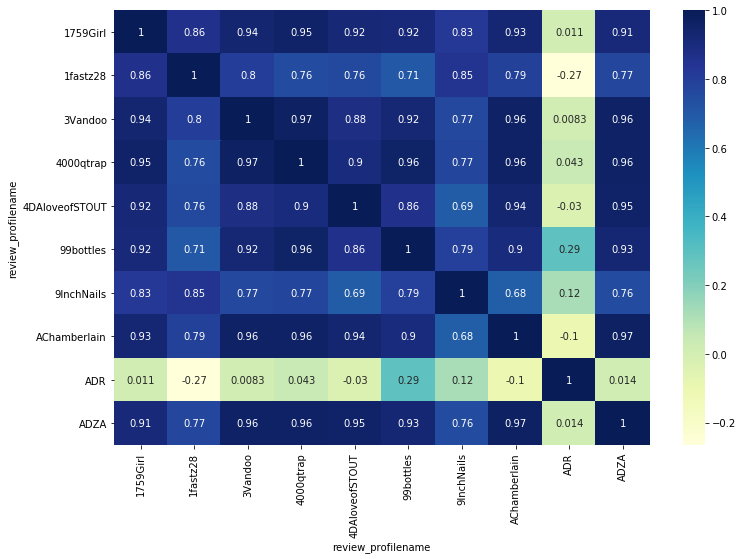

In [54]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_user(method ='pearson'),annot=True,cmap='YlGnBu')
plt.show()

### Evaluation-User Based Similarity

The only difference between evaluation and prediction is that in in evaluation the ratings given by the user are evaluation instead of predicting the user reviews.

In [55]:
# pivot features
test_beer_features = test.pivot_table(index='review_profilename',columns='beer_beerid',values='reviews')

Normalising the beer reviews for every user around the Zero mean

In [56]:
mean= np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

Using Cosine Similarity matriz

In [57]:
# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

[[1.         0.05925647 0.         ... 0.         0.         0.        ]
 [0.05925647 1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


### prediction

In [58]:
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_features.fillna(0))
test_user_predicted_ratings

array([[0.46225217, 2.51398676, 0.45625976, ..., 0.27085671, 0.79877468,
        0.13296031],
       [0.90408442, 2.36626721, 0.48899153, ..., 0.27619692, 0.45214224,
        0.55086097],
       [0.77357734, 0.41235527, 0.4832012 , ..., 0.8553778 , 0.37518861,
        0.66192996],
       ...,
       [1.09237059, 1.7813052 , 1.49816191, ..., 1.06322171, 0.35999802,
        0.86119958],
       [0.89586768, 3.11872342, 0.23175512, ..., 0.18301755, 0.63355355,
        0.        ],
       [0.59190637, 1.44052187, 0.84492141, ..., 0.27271371, 1.06386847,
        0.48099566]])

In [59]:
test_user_final_rating = np.multiply(test_user_predicted_ratings,dummy_test)

In [60]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [61]:
test_beer = test.pivot_table(index='review_profilename',columns='beer_beerid',values='reviews')

In [62]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [63]:
rmse = (sum(sum((test_beer- y )**2))/total_non_nan)**0.5
print(rmse)

1.6203417555559363


### Item Based 

In [64]:
# pivot features
beerfeatures_item= train.pivot_table(index='review_profilename',columns='beer_beerid',values='reviews').T

In [65]:
### Normalisation

In [66]:
mean = np.nanmean(beerfeatures_item, axis=1)
beeradj_subtracted = (beerfeatures_item.T-mean).T

In [67]:
beeradj_subtracted.head()

review_profilename,1759Girl,1fastz28,3Vandoo,4000qtrap,4DAloveofSTOUT,99bottles,9InchNails,AChamberlain,ADR,ADZA,...,zdk9,zeff80,zeledonia,zerk,zhanson88,zimm421,zoolzoo,zoso1967,zoso493,zrab11
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.025862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,-0.156250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.656250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,0.146789,NaN,NaN,NaN,NaN,0.146789,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.285714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Using Similarity Matrix

In [68]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(beeradj_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.00000000e+00 -3.81534802e-02  9.08590358e-02 ... -1.05950047e-02
   1.73744994e-02 -6.95896157e-04]
 [-3.81534802e-02  1.00000000e+00  5.28395490e-02 ...  1.25138851e-01
   4.86840418e-03 -5.42449163e-02]
 [ 9.08590358e-02  5.28395490e-02  1.00000000e+00 ... -5.85382955e-03
  -5.82069334e-05  5.46132035e-02]
 ...
 [-1.05950047e-02  1.25138851e-01 -5.85382955e-03 ...  1.00000000e+00
  -1.16105819e-02  8.86700703e-03]
 [ 1.73744994e-02  4.86840418e-03 -5.82069334e-05 ... -1.16105819e-02
   1.00000000e+00 -9.01779985e-03]
 [-6.95896157e-04 -5.42449163e-02  5.46132035e-02 ...  8.86700703e-03
  -9.01779985e-03  1.00000000e+00]]


Prediction

In [69]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1.        , 0.        , 0.09085904, ..., 0.        , 0.0173745 ,
        0.        ],
       [0.        , 1.        , 0.05283955, ..., 0.12513885, 0.0048684 ,
        0.        ],
       [0.09085904, 0.05283955, 1.        , ..., 0.        , 0.        ,
        0.0546132 ],
       ...,
       [0.        , 0.12513885, 0.        , ..., 1.        , 0.        ,
        0.00886701],
       [0.0173745 , 0.0048684 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.0546132 , ..., 0.00886701, 0.        ,
        1.        ]])

In [70]:
item_predicted_ratings = np.dot((beeradj_subtracted.fillna(0).T),item_correlation)
item_predicted_ratings

array([[ 0.13869868, -0.00308189,  0.04365041, ...,  0.05397453,
        -0.04647746, -0.04336397],
       [ 0.36943549, -0.25542734, -0.0557919 , ...,  0.48208567,
        -0.01612503, -0.02783171],
       [ 0.01714814,  0.0098575 , -0.00465328, ...,  0.06327759,
        -0.00689453,  0.02097322],
       ...,
       [ 0.14521876,  0.01591127,  0.04988823, ...,  0.00831826,
        -0.05391935, -0.05466459],
       [ 0.00903384,  0.02366024, -0.01587585, ...,  0.06412841,
         0.07939288, -0.00452816],
       [ 0.19338614, -0.0138818 ,  0.03034835, ...,  0.02353169,
         0.01989423, -0.0237197 ]])

In [71]:
item_predicted_ratings.shape

(2186, 2499)

In [72]:
dummy_train.shape

(2186, 2499)

In [73]:
dummy_test.shape

(2186, 2499)

In [74]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
1759Girl,0.138699,-0.003082,0.043650,-0.004543,-0.066743,-0.008668,0.041795,0.014568,0.025625,-0.061371,...,-0.135255,-0.066462,-0.023996,-0.092856,-0.059137,0.019262,0.069031,0.053975,-0.046477,-0.043364
1fastz28,0.369435,-0.000000,-0.055792,0.000000,0.029705,0.169072,0.122394,-0.005985,0.119369,0.147370,...,-0.000000,0.061339,0.056731,0.009842,-0.012552,-0.088026,-0.079199,0.482086,-0.016125,-0.027832
3Vandoo,0.017148,0.009858,-0.004653,0.121189,-0.161151,0.049843,0.104421,0.106999,0.099989,-0.003896,...,0.030278,0.021506,0.030671,0.057161,-0.053530,-0.005953,0.046256,0.063278,-0.006895,0.020973
4000qtrap,-0.139791,-0.081949,-0.038828,0.046512,0.009975,0.014868,0.003762,0.054818,-0.076206,0.099480,...,0.035091,0.074355,-0.175845,0.024242,-0.027100,0.047021,0.011525,0.074820,0.000000,0.011409
4DAloveofSTOUT,-0.129669,-0.034697,-0.042665,-0.004226,-0.054399,-0.078275,0.027048,0.027214,0.047774,0.126145,...,-0.018647,-0.020150,0.062970,-0.014319,-0.029186,-0.020948,-0.025124,-0.013495,-0.173303,-0.008844


In [75]:
first_users = item_final_rating.iloc[:10,:10]
first_users 

beer_beerid,5,6,7,10,14,15,17,19,30,31
review_profilename,,,,,,,,,,
1759Girl,0.138699,-0.003082,0.043650,-0.004543,-0.066743,-0.008668,0.041795,0.014568,0.025625,-0.061371
1fastz28,0.369435,-0.000000,-0.055792,0.000000,0.029705,0.169072,0.122394,-0.005985,0.119369,0.147370
3Vandoo,0.017148,0.009858,-0.004653,0.121189,-0.161151,0.049843,0.104421,0.106999,0.099989,-0.003896
4000qtrap,-0.139791,-0.081949,-0.038828,0.046512,0.009975,0.014868,0.003762,0.054818,-0.076206,0.099480
4DAloveofSTOUT,-0.129669,-0.034697,-0.042665,-0.004226,-0.054399,-0.078275,0.027048,0.027214,0.047774,0.126145
99bottles,0.132932,0.078795,0.057653,0.065215,0.177921,0.143680,0.079566,0.021144,0.036929,0.138526
9InchNails,-0.180000,-0.133231,-0.258888,0.000000,0.023373,-0.051081,-0.326699,-0.165532,-0.141480,-0.111925
AChamberlain,0.093666,0.145290,0.181417,0.104829,-0.186830,-0.138391,0.053041,-0.045168,-0.060460,0.023563
ADR,-0.057573,0.105821,0.035133,-0.006817,-0.053844,-0.123807,-0.052528,-0.219307,0.000000,-0.148146


In [76]:
#finding correlation
corr_item=first_users.T.corr
corr_item

<bound method DataFrame.corr of review_profilename  1759Girl  1fastz28   3Vandoo  4000qtrap  4DAloveofSTOUT  \
beer_beerid                                                                   
5                   0.138699  0.369435  0.017148  -0.139791       -0.129669   
6                  -0.003082 -0.000000  0.009858  -0.081949       -0.034697   
7                   0.043650 -0.055792 -0.004653  -0.038828       -0.042665   
10                 -0.004543  0.000000  0.121189   0.046512       -0.004226   
14                 -0.066743  0.029705 -0.161151   0.009975       -0.054399   
15                 -0.008668  0.169072  0.049843   0.014868       -0.078275   
17                  0.041795  0.122394  0.104421   0.003762        0.027048   
19                  0.014568 -0.005985  0.106999   0.054818        0.027214   
30                  0.025625  0.119369  0.099989  -0.076206        0.047774   
31                 -0.061371  0.147370 -0.003896   0.099480        0.126145   

review_profilename 

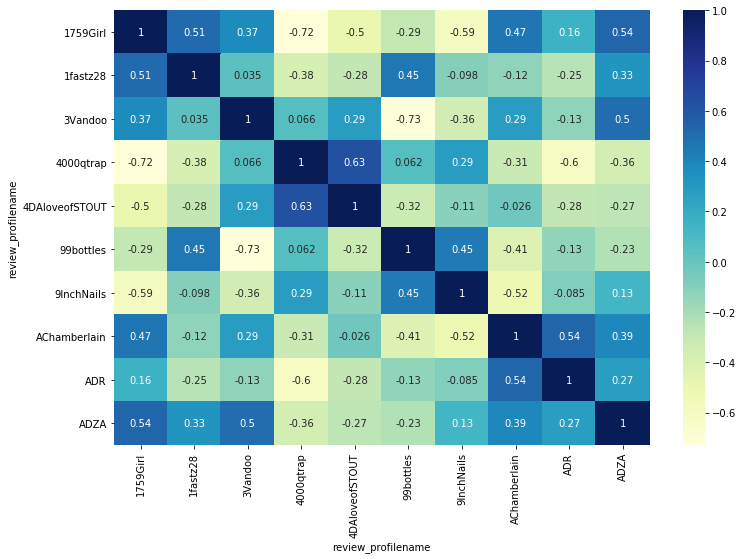

In [77]:
#drawing a correlation map for the first ten users based on item based similarity
plt.figure(figsize=(12,8))
sns.heatmap(first_users.T.corr(method ='pearson'),annot=True,cmap='YlGnBu')
plt.show()

 ### Evaluation-Item Based Similarity

In [78]:
test_beer_item = test.pivot_table(index='review_profilename',columns='beer_beerid',values='reviews').T

In [79]:
mean = np.nanmean(test_beer_item, axis=1)
test_df_subtracted = (test_beer_item.T-mean).T

In [80]:
test_item_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0

In [81]:
test_beer_item.shape

(2499, 2186)

In [82]:
test_item_correlation.shape

(2499, 2499)

### Prediction -Evalutaion

In [83]:
test_item_predicted_ratings = (np.dot(test_item_correlation, test_beer_item.fillna(0))).T
test_item_final_rating = np.multiply(test_item_predicted_ratings,dummy_test)
test_item_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3Vandoo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4000qtrap,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4DAloveofSTOUT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))


test_beer = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='reviews'
)
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

C:\Users\Divya Kota\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Divya Kota\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


MinMaxScaler(feature_range=(1, 5))


In [85]:
rmse = (sum(sum((test_beer - y )**2))/total_non_nan)**0.5
print(rmse)

2.1441010876035245


### Suggestion for Better Model

The lower values of RMSE would mostly indicate the better fit of the mode.RMSE is considered as a good measure for the accurate prediction of the model response and in this case the RMSE for the user based model is 1.62 and the rmse for the item based similarity is 2.14.Therefore, it is implied that the user based model is of better fit in this particular scenario.


### Suggestions for the TOP 5 Beers

According to the project requirements the names of the top 5 beers are 'cokes', 'genog' and 'giblet' using both the models.

### User Based

In [86]:
cokes = pd.DataFrame(user_final_rating[user_final_rating.index=='cokes']).T
cokes.sort_values(by='cokes',ascending=False)[0:5]

review_profilename,cokes
beer_beerid,
1904,22.389063
92,21.744764
34,21.665512
412,21.577222
645,20.478778


In [87]:
genog = pd.DataFrame(user_final_rating[user_final_rating.index=='genog']).T
genog.sort_values(by='genog',ascending=False)[0:5]

review_profilename,genog
beer_beerid,
2093,28.814806
7971,28.383994
1093,26.822160
412,26.573622
645,26.387561


In [88]:
giblet = pd.DataFrame(user_final_rating[user_final_rating.index=='giblet']).T
giblet.sort_values(by='giblet',ascending=False)[0:5]

review_profilename,giblet
beer_beerid,
412,38.971836
2093,37.398848
34,37.246135
1708,35.503418
131,33.826487


### Item Based Similarity

In [89]:
cokes_item = pd.DataFrame(item_final_rating[item_final_rating.index=='cokes']).T
cokes_item.sort_values(by='cokes',ascending=False)[0:5]

review_profilename,cokes
beer_beerid,
9135,1.066708
2671,0.909246
2389,0.723337
2437,0.698753
5051,0.697886


In [90]:
genog_item = pd.DataFrame(item_final_rating[item_final_rating.index=='genog']).T
genog_item.sort_values(by='genog',ascending=False)[0:5]

review_profilename,genog
beer_beerid,
732,0.370711
29721,0.357506
41110,0.338507
60681,0.337643
62432,0.337515


In [91]:
giblet_item = pd.DataFrame(item_final_rating[item_final_rating.index=='giblet']).T
giblet_item.sort_values(by='giblet',ascending=False)[0:5]

review_profilename,giblet
beer_beerid,
36341,0.230292
58876,0.227390
51483,0.215511
35201,0.203865
2588,0.195016


### Summary

The data has been checked for any quality issues such as null values,missing values and duplicate information.The data was cleaned and the right values with optimal number of N has been chosen.The data was prepared, unique values identified and the average beers, users and average number of beer reviews and users have been visualised.The recommendation models based on item based similarity and user based similarity were performed.The ten beers and users were identifited and the similarity between them based on their correlation has been visualised.The different steps to identify and suggest the top five beers to the customers is performed and th ebetter model among the two has been evlauated by using RMSE as the metric and the top five beers are suggested